<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB
The score of  Linear Regression Score: 87.074836%
The score of  Neural Network Score: 86.982708%
The score of Support Vector Machine Score: 88.477354%
The score of  Random Forest Score: 89.701249%


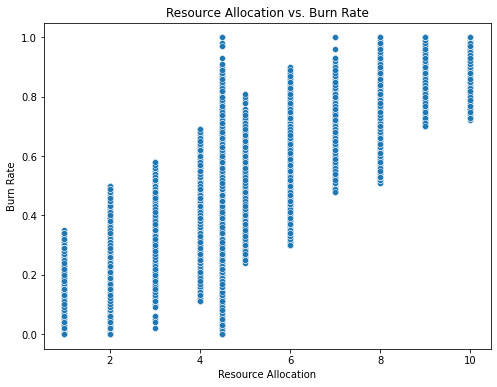

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings(action='ignore')
burnoutDf = pd.read_csv('C:/Users/Deekshi/Downloads/employee_burnout_analysis.csv')
burnoutDf.info()
burnoutDf = burnoutDf.drop('Employee ID', axis=1)
missing_target_rows = burnoutDf.loc[burnoutDf['Burn Rate'].isna(), :].index
burnoutDf = burnoutDf.drop(missing_target_rows, axis=0).reset_index(drop=True)
for column in ['Resource Allocation', 'Mental Fatigue Score']:
    burnoutDf[column] = burnoutDf[column].fillna(burnoutDf[column].mean())

burnoutDf['Date of Joining'] = pd.to_datetime(burnoutDf['Date of Joining'])
burnoutDf['Join Month'] = burnoutDf['Date of Joining'].apply(lambda x: x.month)
burnoutDf['Join Day'] = burnoutDf['Date of Joining'].apply(lambda x: x.day)
burnoutDf = burnoutDf.drop('Date of Joining', axis=1)

burnoutDf['Gender'] = burnoutDf['Gender'].replace({'Female': 1, 'Male': 0})
burnoutDf['Company Type'] = burnoutDf['Company Type'].replace({'Product': 0, 'Service': 1})
burnoutDf['WFH Setup Available'] = burnoutDf['WFH Setup Available'].replace({'No': 0, 'Yes': 1})

y = burnoutDf['Burn Rate']
X = burnoutDf.drop('Burn Rate', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

models = {
    " Linear Regression": LinearRegression(),
    " Neural Network": MLPRegressor(),
    "Support Vector Machine": SVR(),
    " Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)

for name, model in models.items():
    print("The score of "+name + " Score: {:.6%}".format(model.score(X_test, y_test)))
    
plt.figure(figsize=(8, 6))
sns.scatterplot(data=burnoutDf, x='Resource Allocation', y='Burn Rate')
plt.title('Resource Allocation vs. Burn Rate')
plt.xlabel('Resource Allocation')
plt.ylabel('Burn Rate')
plt.show()

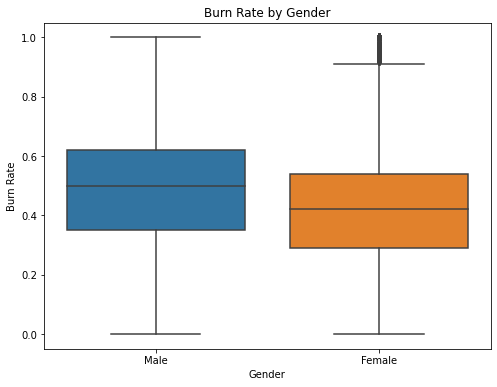

In [4]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=burnoutDf, x='Gender', y='Burn Rate')
plt.title('Burn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Burn Rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

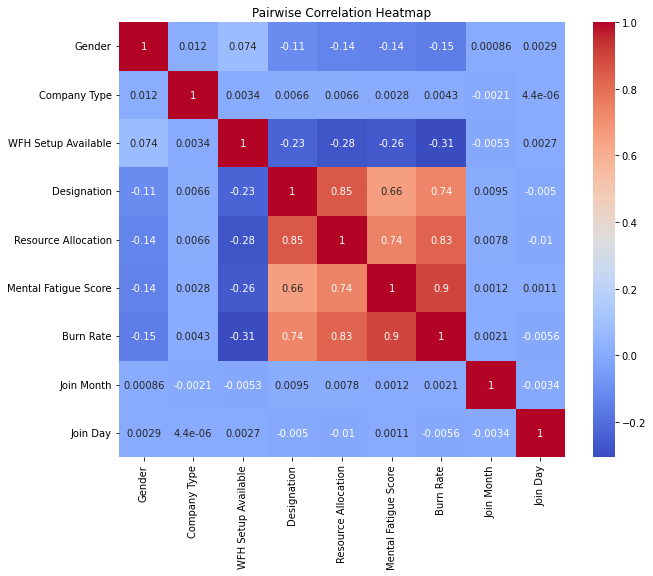

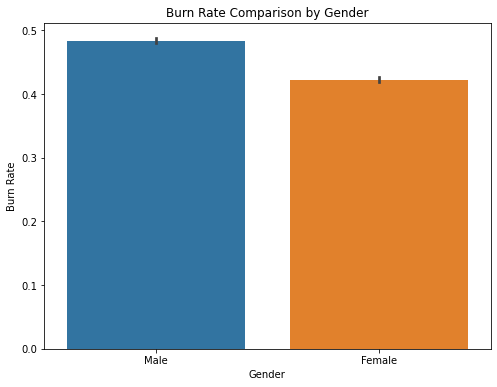

In [5]:

plt.figure(figsize=(10, 8))
sns.heatmap(burnoutDf.corr(), annot=True, cmap='coolwarm')
plt.title('Pairwise Correlation Heatmap')
plt.show()
plt.figure(figsize=(8, 6))
sns.barplot(data=burnoutDf, x='Gender', y='Burn Rate')
plt.title('Burn Rate Comparison by Gender')
plt.xlabel('Gender')
plt.ylabel('Burn Rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

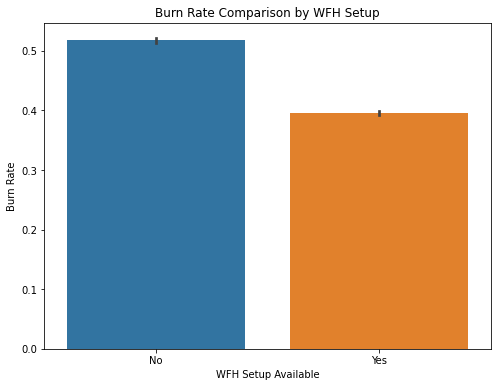

In [6]:

plt.figure(figsize=(8, 6))
sns.barplot(data=burnoutDf, x='WFH Setup Available', y='Burn Rate')
plt.title('Burn Rate Comparison by WFH Setup')
plt.xlabel('WFH Setup Available')
plt.ylabel('Burn Rate')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

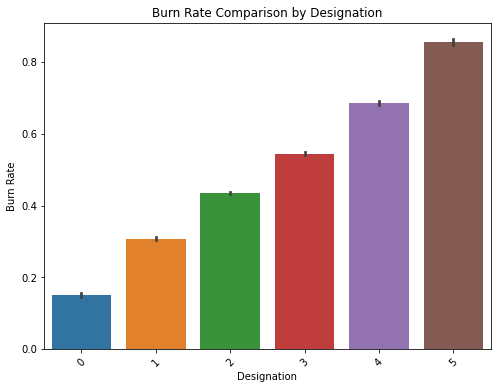

In [8]:

plt.figure(figsize=(8, 6))
sns.barplot(data=burnoutDf, x='Designation', y='Burn Rate')
plt.title('Burn Rate Comparison by Designation')
plt.xlabel('Designation')
plt.ylabel('Burn Rate')
plt.xticks(rotation=45)
plt.show()